In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from stepwise_regression import step_reg
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, IsolationForest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_bp = pd.read_excel('C:/X_bp.xlsx')
df_nup = pd.read_excel('C:/X_nup.xlsx')

In [3]:
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.index.rename('index', inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [5]:
df.describe(include='all').round(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0
mean,2.9,1975.7,739.9,110.6,22.2,285.9,482.7,73.3,2466.9,218.4,44.3,6.9,57.2
std,0.9,73.7,330.2,28.3,2.4,40.9,281.3,3.1,485.6,59.7,45.0,2.6,12.4
min,0.4,1731.8,2.4,17.7,14.3,100.0,0.6,64.1,1036.9,33.8,0.0,0.0,0.0
25%,2.3,1924.2,500.0,92.4,20.6,259.1,266.8,71.2,2135.9,179.6,0.0,5.1,49.8
50%,2.9,1977.6,739.7,110.6,22.2,285.9,451.9,73.3,2459.5,219.2,0.0,6.9,57.3
75%,3.6,2021.4,961.8,129.7,24.0,313.0,693.2,75.4,2767.2,257.5,90.0,8.6,64.9
max,5.6,2207.8,1911.5,199.0,33.0,413.3,1399.5,82.7,3848.4,414.6,90.0,14.4,104.0


### Рассматривается модуль упругости при растяжении

1 Переименование целевой переменной

In [6]:
df['y_1'] = df['Модуль упругости при растяжении, ГПа']
df = df.drop(columns=['Модуль упругости при растяжении, ГПа'])

In [7]:
# Кодирование угла нашивки
# df.loc[df["Угол нашивки, град"] == 90, "Угол нашивки, град"] = 1

2 Удаление выбросов

In [8]:
clfout = IsolationForest(n_estimators=200, max_samples = 'auto', random_state = 1)    # contamination=float(0.1), 
clfout.fit(df)
df['anomaly'] = clfout.predict(df)
df = df[df.anomaly == 1]
df = df.drop(columns = 'anomaly')

# cols = df.columns
# for col in cols:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print(df.shape)

(937, 13)


3 EDA

3.1 Визуализация данных

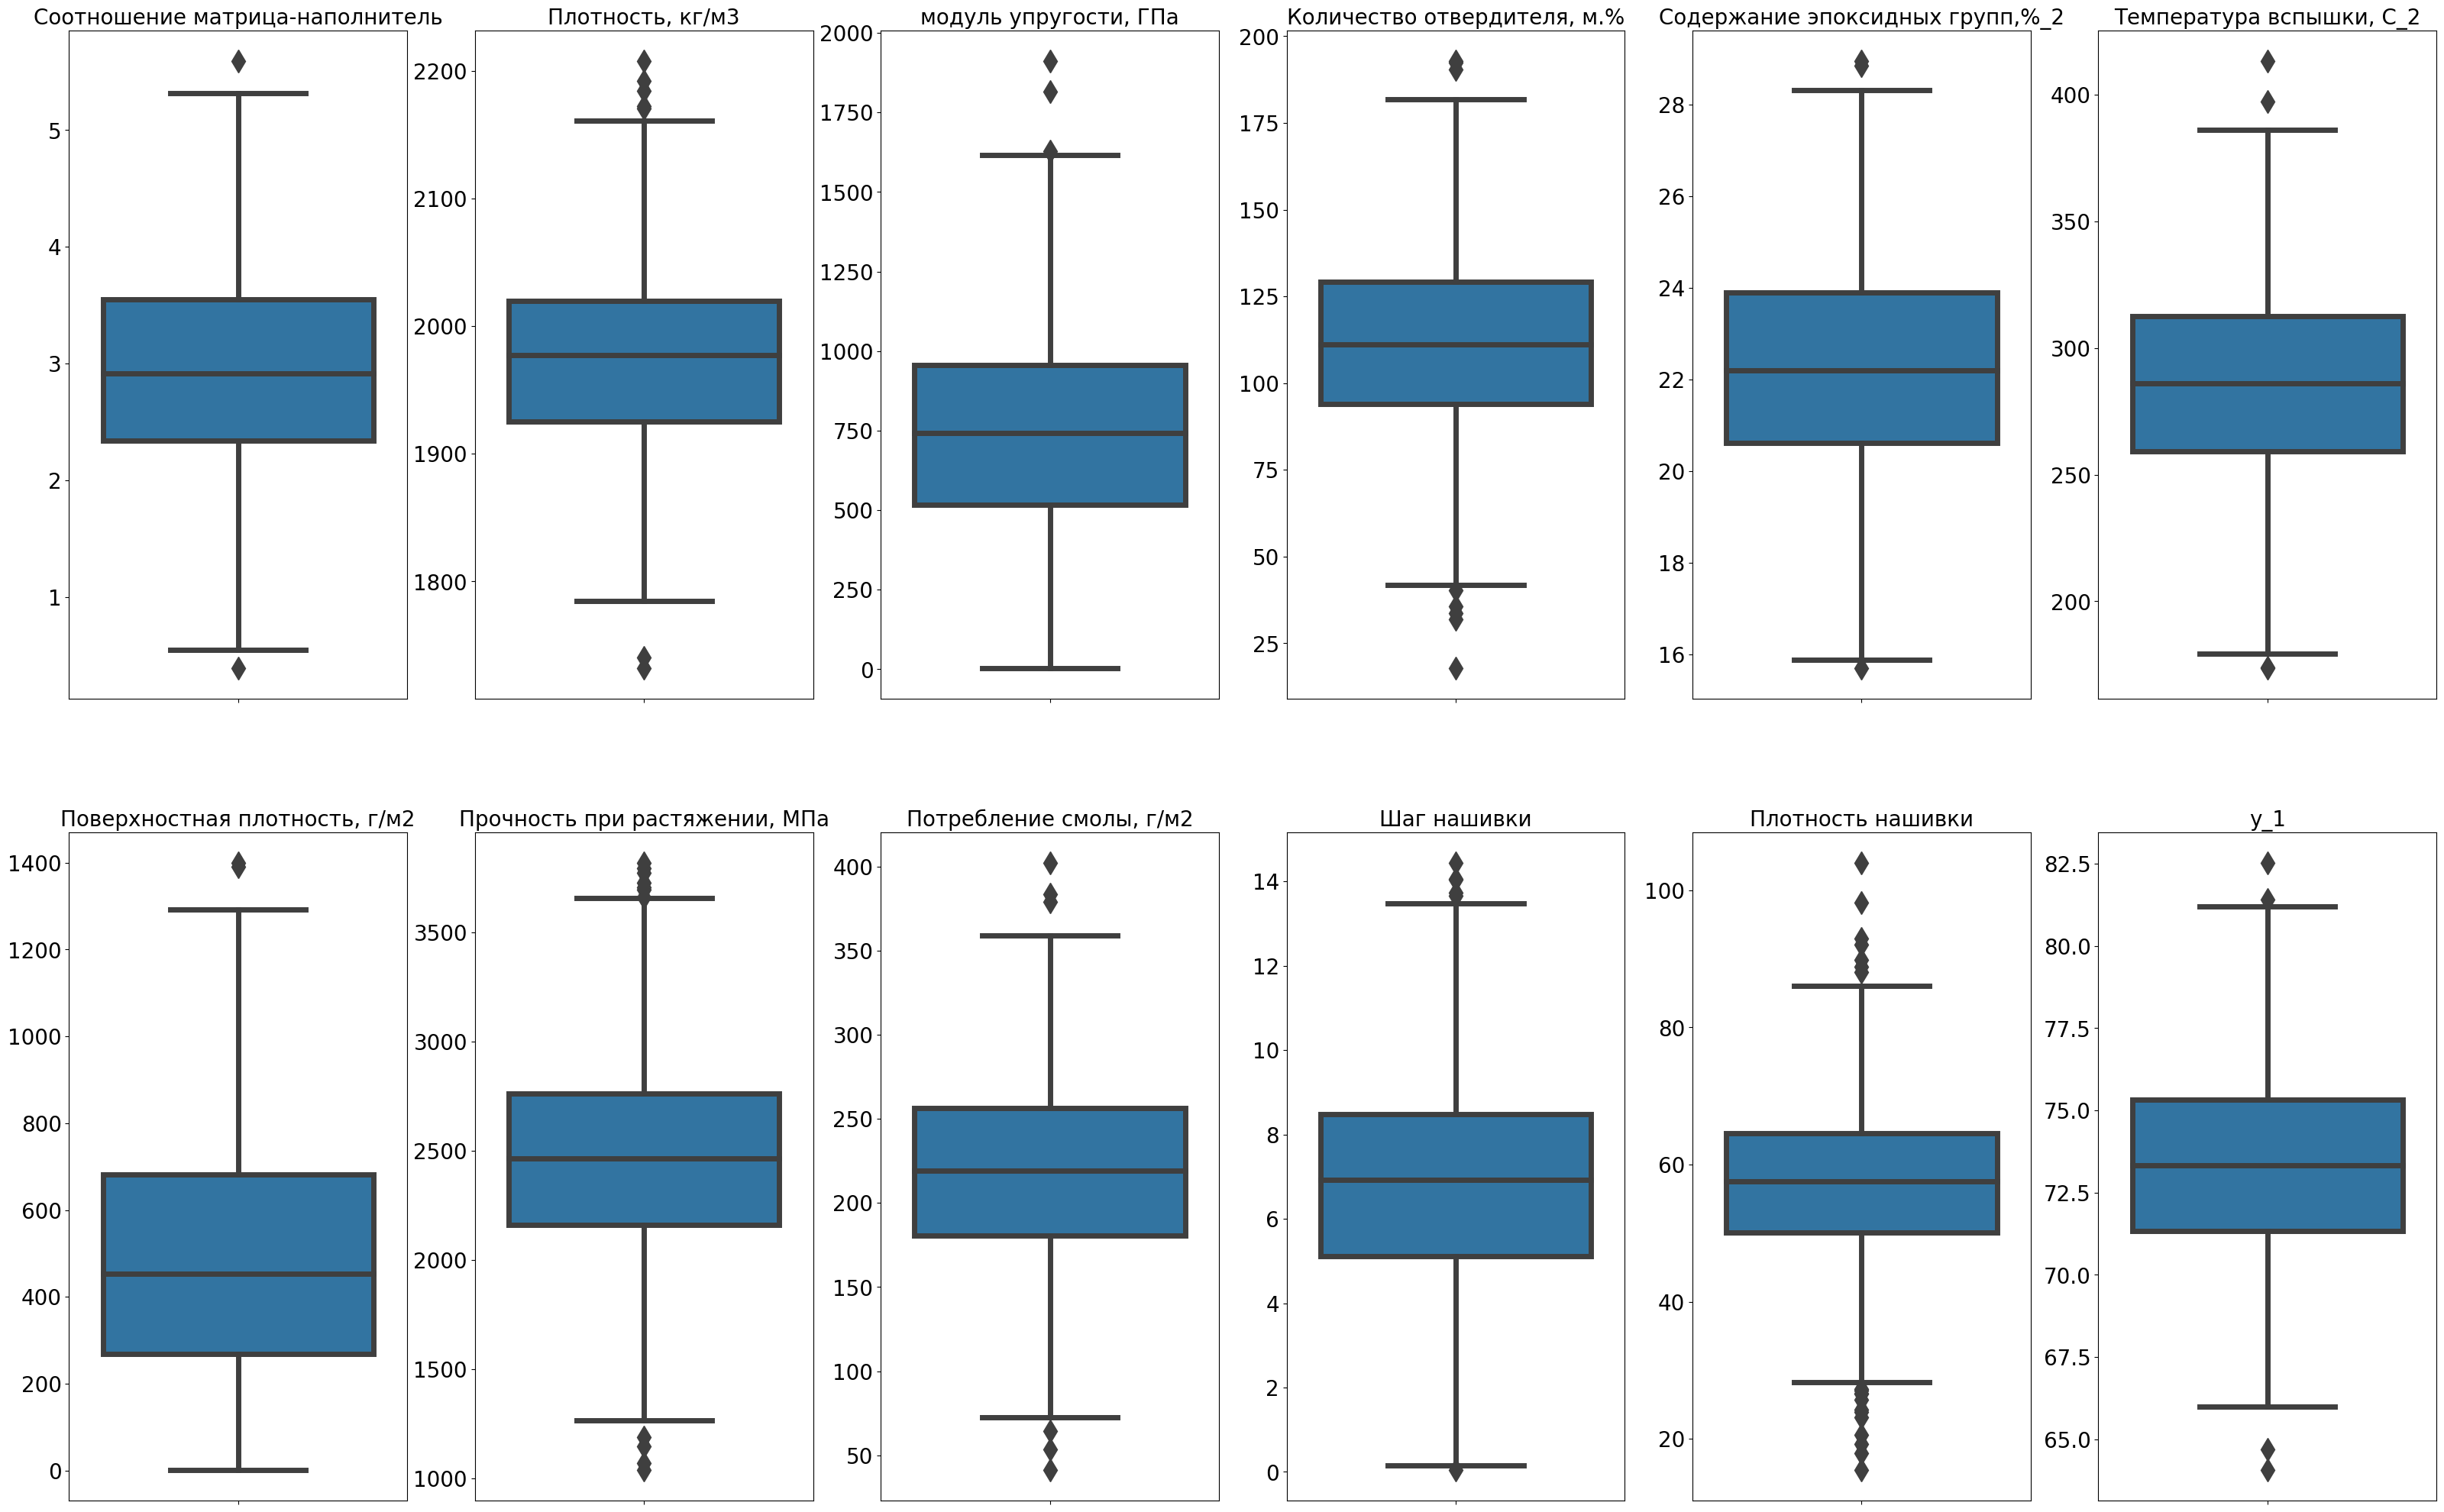

In [9]:
plt.figure(figsize=(40, 25))

for i, col in enumerate(df.drop('Угол нашивки, град', axis=1), start=1):
    plt.subplot(2, 6, i)
    sns.boxplot(data=df, y=col, fliersize=15, linewidth=5)
    # plt.setp(plt.gca().get_xticklabels(), fontsize=8)
    plt.setp(plt.gca().get_yticklabels(), fontsize=20)
    plt.title(col, size=20)
    plt.ylabel(None)

In [10]:
# sns.pairplot(df, kind="reg")    # hue = 'Угол нашивки, град',
# plt.show()

3.2 Приведение к нормальному распределению (методом Йео-Джонсона)

In [11]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
columns_to_transform = df.columns.difference(['y_1', 'Угол нашивки, град'])
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

In [12]:
# sns.pairplot(df, kind="reg")    # hue = 'Угол нашивки, град',
# plt.show()

4 Отбор признаков

In [13]:
x_0 = 'Соотношение матрица-наполнитель'
x_1 = 'Плотность, кг/м3'
x_2 = 'модуль упругости, ГПа'
x_3 = 'Количество отвердителя, м.%'
x_4 = 'Содержание эпоксидных групп,%_2'
x_5 = 'Температура вспышки, С_2'
x_6 = 'Поверхностная плотность, г/м2'
x_7 = 'Модуль упругости при растяжении, ГПа'
x_8 = 'Прочность при растяжении, МПа'
x_9 = 'Потребление смолы, г/м2'
x_10 = 'Угол нашивки, град'
x_11 = 'Шаг нашивки'
x_12 = 'Плотность нашивки'

    Рассматривается 'Угол нашивки' = 0 и 90

In [14]:
# df = df[df['Угол нашивки, град'] == 0]
# df = df.drop(columns=['Угол нашивки, град'])

4.1 Корреляционные матрицы

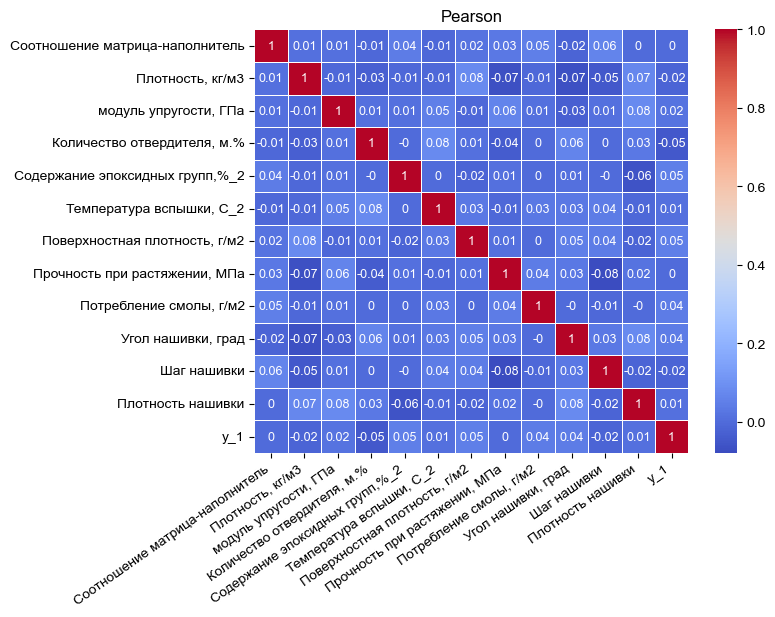

In [15]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

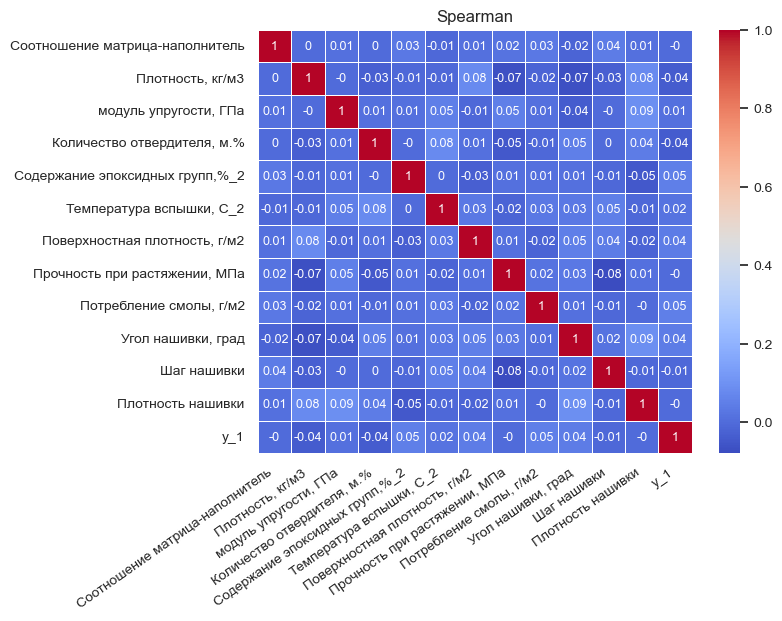

In [16]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='spearman').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Spearman')
plt.show()

4.2 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [17]:
corr_matrix_p = df.corr(method='pearson')
corr_matrix_s = df.corr(method='spearman')
# коэффициенты корреляции между y и x
corr_yx_p = corr_matrix_p['y_1'][:-1]
corr_yx_s = corr_matrix_s['y_1'][:-1]
# коэффициенты парной корреляции между x
corr_x_p = np.delete(np.array(corr_matrix_p), -1, axis=0)[:, :-1]
corr_x_s = np.delete(np.array(corr_matrix_s), -1, axis=0)[:, :-1]

det_r_yx_p = np.linalg.det(corr_matrix_p)
det_r_x_p = np.linalg.det(corr_matrix_p.iloc[:-1, :-1])
R2_P = 1 - det_r_yx_p / det_r_x_p

det_r_yx_s = np.linalg.det(corr_matrix_s)
det_r_x_s = np.linalg.det(corr_matrix_s.iloc[:-1, :-1])
R2_S = 1 - det_r_yx_s / det_r_x_s
print()
print(f"Прогноз коэф. детерминации R2 Pearson:  {R2_P.round(3)}")
print(f"Прогноз коэф. детерминации R2 Spearman: {R2_S.round(3)}")


Прогноз коэф. детерминации R2 Pearson:  0.012
Прогноз коэф. детерминации R2 Spearman: 0.012


In [18]:
X_1 = df.copy()
y_1 = X_1.pop('y_1')

4.3 Анализ значимости признаков

MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [19]:
mi_full = mutual_info_regression(X_1, y_1, random_state=2023)
f_full = f_regression(X_1, y_1)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X_1.corrwith(y_1), 'f':f_full[0], 'p':f_full[1]}, index=X_1.columns)
f_p_full.round(3)

,MI,corr,f,p
Соотношение матрица-наполнитель,0.000,0.001,0.001,0.978
"Плотность, кг/м3",0.004,-0.024,0.540,0.462
"модуль упругости, ГПа",0.006,0.020,0.376,0.540
"Количество отвердителя, м.%",0.000,-0.047,2.081,0.149
"Содержание эпоксидных групп,%_2",0.014,0.046,2.024,0.155
"Температура вспышки, С_2",0.026,0.014,0.194,0.660
"Поверхностная плотность, г/м2",0.098,0.048,2.186,0.140
"Прочность при растяжении, МПа",0.062,0.001,0.001,0.972
"Потребление смолы, г/м2",0.092,0.041,1.538,0.215
"Угол нашивки, град",0.007,0.041,1.581,0.209


4.4 Анализ мультиколлинеарности признаков

In [20]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df, features = df.columns)

,VIF,Tolerance
Соотношение матрица-наполнитель,1.009581,0.990510
"Плотность, кг/м3",1.029632,0.971221
"модуль упругости, ГПа",1.014243,0.985957
"Количество отвердителя, м.%",1.017901,0.982413
"Содержание эпоксидных групп,%_2",1.008008,0.992056
"Температура вспышки, С_2",1.013914,0.986277
"Поверхностная плотность, г/м2",1.016771,0.983505
"Прочность при растяжении, МПа",1.021793,0.978672
"Потребление смолы, г/м2",1.006070,0.993967
"Угол нашивки, град",1.025920,0.974734


4.5 Пошаговый отбор признаков (stepwise regression)

In [21]:
backselect = step_reg.backward_regression(X_1, y_1, 0.2, verbose=False)
forwardselect = step_reg.forward_regression(X_1, y_1, 0.2, verbose=False)
print(backselect)
print(forwardselect)

['Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Поверхностная плотность, г/м2']
['Поверхностная плотность, г/м2', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2']


#### В результате пошагового отбора рассматриваем следующие признаки:

In [22]:
df = df.loc[:, [x_3, x_4, x_6, 'y_1']]

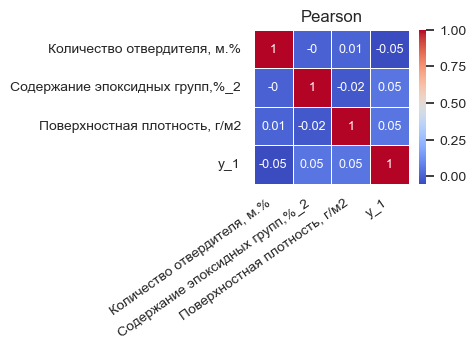

In [23]:
plt.figure(figsize=(2.5, 2))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5 Разделение датасета на train и test, масштабирование

In [24]:
X_1 = df.drop(['y_1'], axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_1, # X_poly - если использовать полиномиальную регрессию
                                                    y_1,
                                                    test_size=0.3,
                                                    random_state=321)
print(X_train.shape)
print(X_test.shape)

(655, 3)
(282, 3)


In [26]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)
# X_train_std = X_train
# X_test_std = X_test

6 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [27]:
df_train = pd.DataFrame(data=X_train_std, columns=X_1.columns)
df_train['y_1'] = y_train.reset_index(drop=True)
df_test = pd.DataFrame(data=X_test_std, columns=X_1.columns)
df_test['y_1'] = y_test.reset_index(drop=True)

corr_matrix_train = df_train.corr(method='pearson')
corr_matrix_test = df_test.corr(method='pearson')

corr_yx_train = corr_matrix_train['y_1'][:-1]    # коэффициенты корреляции между y и x
corr_yx_test = corr_matrix_test['y_1'][:-1]    # коэффициенты корреляции между y и x

corr_x_train = np.delete(np.array(corr_matrix_train), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x
corr_x_test = np.delete(np.array(corr_matrix_test), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx_train = np.linalg.det(corr_matrix_train)
det_r_x_train = np.linalg.det(corr_matrix_train.iloc[:-1, :-1])
R2_train = 1 - det_r_yx_train / det_r_x_train
det_r_yx_test = np.linalg.det(corr_matrix_test)
det_r_x_test = np.linalg.det(corr_matrix_test.iloc[:-1, :-1])
R2_test = 1 - det_r_yx_test / det_r_x_test
print(f"Оценка R2 для full-выборки:  {R2_P.round(3)}")
print(f"Оценка R2 для train-выборки: {R2_train.round(3)}")
print(f"Оценка R2 для test-выборки:  {R2_test.round(3)}")

Оценка R2 для full-выборки:  0.012
Оценка R2 для train-выборки: 0.008
Оценка R2 для test-выборки:  0.005


#### 7 Обучение моделей

In [28]:
metrics = {}

7.1 LinearRegression

In [29]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

y_lr_pred = model_lr.predict(X_test)
y_lr_pred_train = model_lr.predict(X_train)

rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_lr_pred_train)).round(3)
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_lr_pred)).round(3)
mae_lr_train = mean_absolute_error(y_train, y_lr_pred_train).round(3)
mae_lr_test = mean_absolute_error(y_test, y_lr_pred).round(3)
r2_lr_train = r2_score(y_train, y_lr_pred_train).round(3)
r2_lr_test = r2_score(y_test, y_lr_pred).round(3)
metrics['LinearRegression'] = (rmse_lr_train, rmse_lr_test, mae_lr_train, mae_lr_test, r2_lr_train, r2_lr_test)

print(f'RMSE train: {rmse_lr_train}')
print(f'RMSE test:  {rmse_lr_test}')
print()
print(f'MAE train:  {mae_lr_train}')
print(f'MAE test:   {mae_lr_test}')
print()
print(f'R2 train:   {r2_lr_train}')
print(f'R2 test:    {r2_lr_test}')
print()
print('Коэффициенты регрессии:')
print(pd.DataFrame(model_lr.coef_[:], index=X_1.columns, columns=['k']).round(5))
print()
print(f'Свободный член регрессии  a0 =  {model_lr.intercept_.round(3)}')

RMSE train: 3.015
RMSE test:  2.957

MAE train:  2.438
MAE test:   2.361

R2 train:   0.008
R2 test:    0.003

Коэффициенты регрессии:
                                       k
Количество отвердителя, м.%     -0.13516
Содержание эпоксидных групп,%_2  0.16231
Поверхностная плотность, г/м2    0.18121

Свободный член регрессии  a0 =  73.363


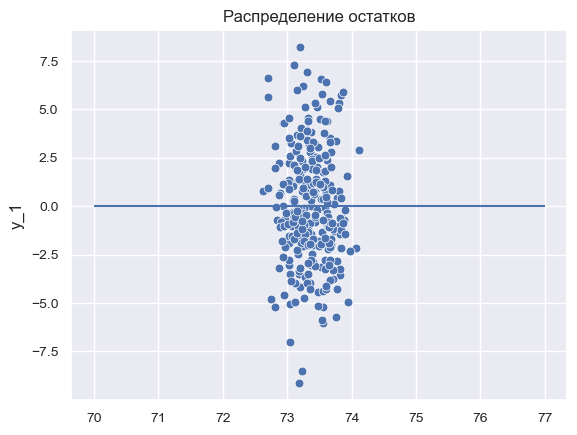

In [30]:
sns.scatterplot(x = y_lr_pred, y = y_test - y_lr_pred, s = 40)
plt.hlines(y = 0, xmin = 70, xmax = 77)
plt.title('Распределение остатков')
plt.show()

7.2 ElasticNet

In [31]:
en = ElasticNet()
en_parameters = {'alpha': (0.01, 0.03, 0.1, 0.3, 1, 3, 10), 
                 'l1_ratio': (0.05, 0.1, 0.3, 0.5, 0.7, 0.9),
                 'random_state':[1, 7, 42, 100]
}
model_en = GridSearchCV(estimator=en,
                   param_grid=en_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_en.fit(X_train_std, y_train)

y_en_pred = model_en.predict(X_test_std)
y_en_pred_train = model_en.predict(X_train_std)

rmse_en_train = np.sqrt(mean_squared_error(y_train, y_en_pred_train)).round(3)
rmse_en_test = np.sqrt(mean_squared_error(y_test, y_en_pred)).round(3)
mae_en_train = mean_absolute_error(y_train, y_en_pred_train).round(3)
mae_en_test = mean_absolute_error(y_test, y_en_pred).round(3)
r2_en_train = r2_score(y_train, y_en_pred_train).round(3)
r2_en_test = r2_score(y_test, y_en_pred).round(3)
metrics['ElasticNet'] = (rmse_en_train, rmse_en_test, mae_en_train, mae_en_test, r2_en_train, r2_en_test)

print(f'RMSE train: {rmse_en_train}')
print(f'RMSE test:  {rmse_en_test}')
print()
print(f'MAE train:  {mae_en_train}')
print(f'MAE test:   {mae_en_test}')
print()
print(f'R2 train:   {r2_en_train}')
print(f'R2 test:    {r2_en_test}')
model_en.best_params_

RMSE train: 3.017
RMSE test:  2.955

MAE train:  2.441
MAE test:   2.357

R2 train:   0.006
R2 test:    0.004


{'alpha': 0.3, 'l1_ratio': 0.05, 'random_state': 1}

7.3 GradientBoostingRegressor

In [32]:
gbr = GradientBoostingRegressor()
gbr_parameters = {
    'n_estimators' : range(100, 600, 100),
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1147, 7, 42, 100]
}
model_gbr = GridSearchCV(estimator=gbr,
                   param_grid=gbr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_gbr.fit(X_train_std, y_train)

y_gbr_pred = model_gbr.predict(X_test_std)
y_gbr_pred_train = model_gbr.predict(X_train_std)

rmse_gbr_train = np.sqrt(mean_squared_error(y_train, y_gbr_pred_train)).round(3)
rmse_gbr_test = np.sqrt(mean_squared_error(y_test, y_gbr_pred)).round(3)
mae_gbr_train = mean_absolute_error(y_train, y_gbr_pred_train).round(3)
mae_gbr_test = mean_absolute_error(y_test, y_gbr_pred).round(3)
r2_gbr_train = r2_score(y_train, y_gbr_pred_train).round(3)
r2_gbr_test = r2_score(y_test, y_gbr_pred).round(3)
metrics['GradientBoosting'] = (rmse_gbr_train, rmse_gbr_test, mae_gbr_train, mae_gbr_test, r2_gbr_train, r2_gbr_test)

print(f'RMSE train: {rmse_gbr_train}')
print(f'RMSE test:  {rmse_gbr_test}')
print()
print(f'MAE train:  {mae_gbr_train}')
print(f'MAE test:   {mae_gbr_test}')
print()
print(f'R2 train:   {r2_gbr_train}')
print(f'R2 test:    {r2_gbr_test}')
model_gbr.best_params_

RMSE train: 2.927
RMSE test:  2.958

MAE train:  2.359
MAE test:   2.354

R2 train:   0.065
R2 test:    0.002


{'criterion': 'friedman_mse',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 1147}

7.4 RandomForestRegressor

In [33]:
rfr = RandomForestRegressor()
rfr_parameters = {
    'n_estimators' : range(100, 600, 100),
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1, 7, 42, 1147]
}
model_rfr = GridSearchCV(estimator=rfr,
                   param_grid=rfr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_rfr.fit(X_train_std, y_train)

y_rfr_pred = model_rfr.predict(X_test_std)
y_rfr_pred_train = model_rfr.predict(X_train_std)

rmse_rfr_train = np.sqrt(mean_squared_error(y_train, y_rfr_pred_train)).round(3)
rmse_rfr_test = np.sqrt(mean_squared_error(y_test, y_rfr_pred)).round(3)
mae_rfr_train = mean_absolute_error(y_train, y_rfr_pred_train).round(3)
mae_rfr_test = mean_absolute_error(y_test, y_rfr_pred).round(3)
r2_rfr_train = r2_score(y_train, y_rfr_pred_train).round(3)
r2_rfr_test = r2_score(y_test, y_rfr_pred).round(3)
metrics['RandomForest'] = (rmse_rfr_train, rmse_rfr_test, mae_rfr_train, mae_rfr_test, r2_rfr_train, r2_rfr_test)

print(f'RMSE train: {rmse_rfr_train}')
print(f'RMSE test:  {rmse_rfr_test}')
print()
print(f'MAE train:  {mae_rfr_train}')
print(f'MAE test:   {mae_rfr_test}')
print()
print(f'R2 train:   {r2_rfr_train}')
print(f'R2 test:    {r2_rfr_test}')
model_rfr.best_params_

RMSE train: 2.996
RMSE test:  2.955

MAE train:  2.424
MAE test:   2.356

R2 train:   0.02
R2 test:    0.005


{'criterion': 'squared_error',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 400,
 'random_state': 42}

7.5 KNeighborsRegressor

In [34]:
knr = KNeighborsRegressor()
knr_parameters = {'n_neighbors' : range(1, 101, 2), 
          # 'weights' : ['uniform', 'distance'],
          # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
model_knr = GridSearchCV(estimator=knr,
                   param_grid=knr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_knr.fit(X_train_std, y_train)

y_knr_pred = model_knr.predict(X_test_std)
y_knr_pred_train = model_knr.predict(X_train_std)

rmse_knr_train = np.sqrt(mean_squared_error(y_train, y_knr_pred_train)).round(3)
rmse_knr_test = np.sqrt(mean_squared_error(y_test, y_knr_pred)).round(3)
mae_knr_train = mean_absolute_error(y_train, y_knr_pred_train).round(3)
mae_knr_test = mean_absolute_error(y_test, y_knr_pred).round(3)
r2_knr_train = r2_score(y_train, y_knr_pred_train).round(3)
r2_knr_test = r2_score(y_test, y_knr_pred).round(3)
metrics['KNeighbors'] = (rmse_knr_train, rmse_knr_test, mae_knr_train, mae_knr_test, r2_knr_train, r2_knr_test)

print(f'RMSE train: {rmse_knr_train}')
print(f'RMSE test:  {rmse_knr_test}')
print()
print(f'MAE train:  {mae_knr_train}')
print(f'MAE test:   {mae_knr_test}')
print()
print(f'R2 train:   {r2_knr_train}')
print(f'R2 test:    {r2_knr_test}')
model_knr.best_params_

RMSE train: 3.012
RMSE test:  2.946

MAE train:  2.442
MAE test:   2.342

R2 train:   0.01
R2 test:    0.01


{'n_neighbors': 79}

7.6 TheilSenRegressor

In [35]:
tsr = TheilSenRegressor()
tsr_parameters = {
    'random_state':[1, 7, 42, 100]
}
model_tsr = GridSearchCV(estimator=tsr,
                   param_grid=tsr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_tsr.fit(X_train_std, y_train)

y_tsr_pred = model_tsr.predict(X_test_std)
y_tsr_pred_train = model_tsr.predict(X_train_std)

rmse_tsr_train = np.sqrt(mean_squared_error(y_train, y_tsr_pred_train)).round(3)
rmse_tsr_test = np.sqrt(mean_squared_error(y_test, y_tsr_pred)).round(3)
mae_tsr_train = mean_absolute_error(y_train, y_tsr_pred_train).round(3)
mae_tsr_test = mean_absolute_error(y_test, y_tsr_pred).round(3)
r2_tsr_train = r2_score(y_train, y_tsr_pred_train).round(3)
r2_tsr_test = r2_score(y_test, y_tsr_pred).round(3)
metrics['TheilSen'] = (rmse_tsr_train, rmse_tsr_test, mae_tsr_train, mae_tsr_test, r2_tsr_train, r2_tsr_test)

print(f'RMSE train: {rmse_tsr_train}')
print(f'RMSE test:  {rmse_tsr_test}')
print()
print(f'MAE train:  {mae_tsr_train}')
print(f'MAE test:   {mae_tsr_test}')
print()
print(f'R2 train:   {r2_tsr_train}')
print(f'R2 test:    {r2_tsr_test}')
model_tsr.best_params_

RMSE train: 3.016
RMSE test:  2.958

MAE train:  2.436
MAE test:   2.358

R2 train:   0.007
R2 test:    0.002


{'random_state': 100}

8. Сводная таблица метрик моделей

In [36]:
df_metrics = pd.DataFrame(metrics)
df_metrics.index = ['RMSE train', 'RMSE test', 'MAE train', 'MAE test', 'R2 train', 'R2 test']
df_metrics

,LinearRegression,ElasticNet,GradientBoosting,RandomForest,KNeighbors,TheilSen
RMSE train,3.015,3.017,2.927,2.996,3.012,3.016
RMSE test,2.957,2.955,2.958,2.955,2.946,2.958
MAE train,2.438,2.441,2.359,2.424,2.442,2.436
MAE test,2.361,2.357,2.354,2.356,2.342,2.358
R2 train,0.008,0.006,0.065,0.020,0.010,0.007
R2 test,0.003,0.004,0.002,0.005,0.010,0.002


9. Доверительный интервал для предсказаний лучшей модели

In [37]:
y_pred = y_knr_pred

In [38]:
# Вычисляем доверительный интервал для прогноза
# std, lower, upper = wls_prediction_std(lr, X_test_std, alpha=0.05)
n = len(y_test)
p = len(X_test_std[0])
se = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p))

# Задаем уровень доверия
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, n - p)

lower = y_pred - t_value * se
upper = y_pred + t_value * se

# Выводим результаты
y_test = y_test.values
print("Доверительный интервал для прогноза:")
print(f"Нижняя граница:  {lower[:12].round(2)}")
print(f"y_test:          {y_test[:12].round(2)}")
print(f"y_pred:          {y_pred[:12].round(2)}")
print(f"Верхняя граница: {upper[:12].round(2)}")
print()
print(f"Разброс тестовых значений:       {y_test.min().round(2)}; {y_test.max().round(2)}")
print(f"Разброс предсказанных значений:  {y_pred.min().round(2)}; {y_pred.max().round(2)}")
print()
print(f"Наименьшая нижняя граница доверительного интервала:  {lower.min().round(2)}")
print(f"Набольшая верхняя граница доверительного интервала:  {upper.max().round(2)}")

Доверительный интервал для прогноза:
Нижняя граница:  [67.13 67.86 67.36 67.13 67.92 67.77 67.69 67.36 67.01 67.58 67.45 67.54]
y_test:          [69.67 80.25 74.37 64.05 69.69 73.75 74.67 74.86 72.64 69.61 74.41 75.15]
y_pred:          [72.96 73.69 73.2  72.96 73.75 73.61 73.52 73.19 72.85 73.41 73.28 73.37]
Верхняя граница: [78.79 79.52 79.03 78.79 79.58 79.44 79.35 79.02 78.68 79.24 79.11 79.2 ]

Разброс тестовых значений:       64.05; 81.42
Разброс предсказанных значений:  72.53; 74.13

Наименьшая нижняя граница доверительного интервала:  66.7
Набольшая верхняя граница доверительного интервала:  79.96


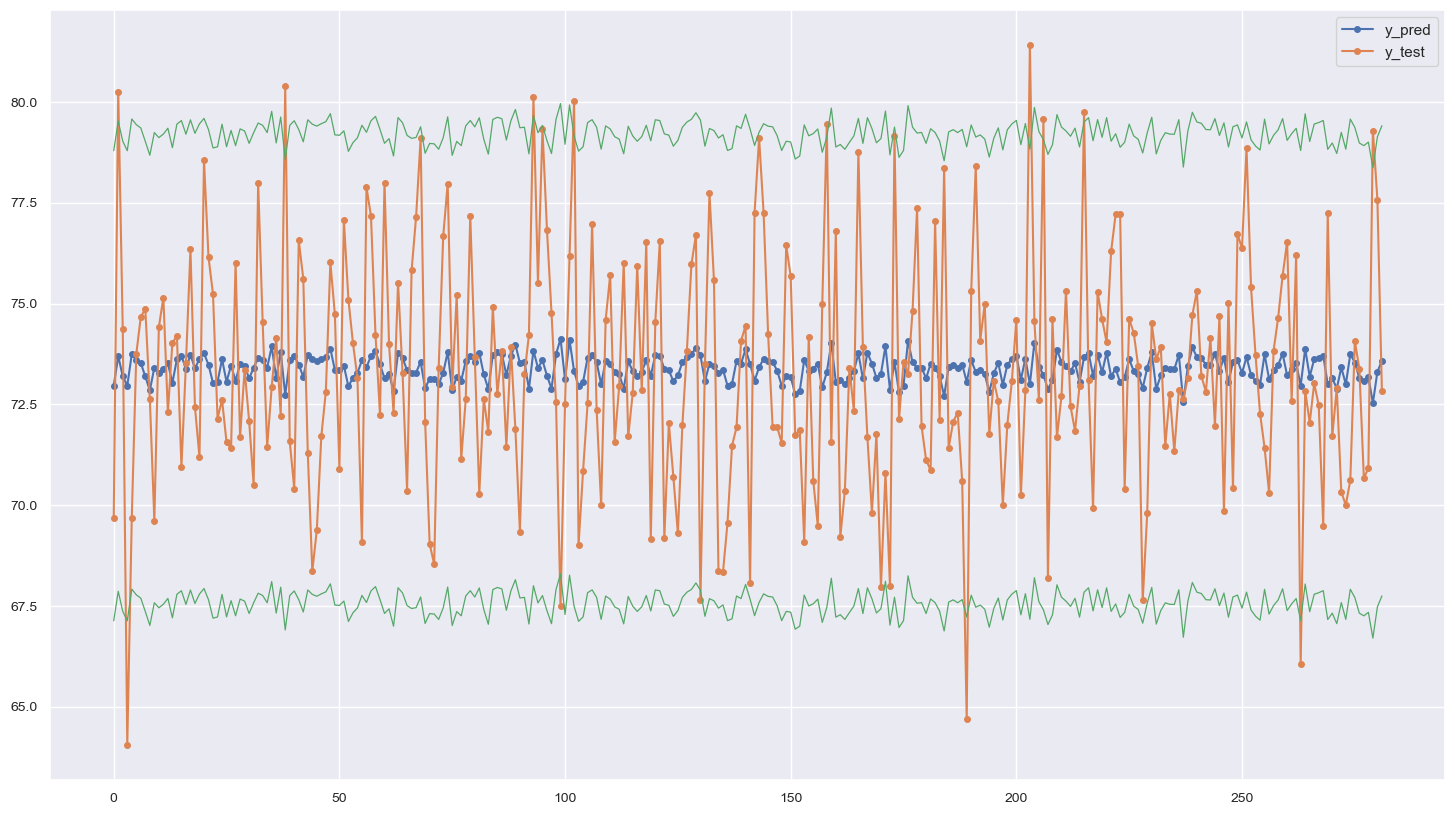

In [39]:
plt.figure(figsize=(18, 10))
plt.plot(y_pred, label='y_pred', marker='o', markersize=4)
plt.plot(y_test, label='y_test', marker='o', markersize=4)
plt.plot(lower, linewidth = 0.9, color='g')
plt.plot(upper, linewidth = 0.9, color='g')
plt.legend()
plt.grid(True)
plt.show()